# Notebook 2: Clustering

Este notebook tiene como propósito procesar los datos y la creación de clusters.

Los métodos propuestos para ello son: 
- `K-means`
- `DBSCAN`

La intención inicial es la contrucción del cluster con

**Variables cuantitativas de la canción**



| Nombre           | Descripción                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | Rango    |
| ---------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | -------- |
| danceability     | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.                                                                                                                                                                                                                                                                       | [0, 1]   |
| energy           | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.                                                                                                                          | [0, 1]   |
| key              | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1                                                                                                                                                                                                                                                                                                                             | [-1, 2]  |
| loudness         | The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db.                                                                                                                                                                                                                                                                                                                                                                                                                       | [-60, 0] |
| speechiness      | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. | [0, 1]   |
| acounstiscness   | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic                                                                                                                                                                                                                                                                                                                                                                                        | [0, 1]   |
| instrumentalness | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.                                                                                                                 | [0, 1]   |
| valence          | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).                                                                                                                                                                                                                                                                  | [0, 1]   |
| tempo            | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration                                                                                                                                                                                                                                                                                                                          | [0, 200] |



Fuente: [Kaggle](https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs/data)

De manera similar, utilizamos una característica el genéro que indica la playlist en la que se presenta. 

- playlist_genre

Y finalmente, utilizamos los resultados del primer notebook: 

- lyrics_sentiment
- album_name_sentiment
- track_name_sentiment
- playlist_name_sentiment


Por supuesto el uso de estas variables requieren su respectivo preprocesamiento para su uso en K-means.  

## Pre-procesamiento

El objetivo de este espacio es conocer un poco más sobre las variables a las clusterizar, descartar las que no tengan una distribución clara y escalar aquellas que si sean de utilidad. 

Para la que no es coninua (el género) debemos codificarla con get_dummies. 

In [50]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv("./data/spotify_songs_processed.csv")

In [52]:
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics_sentiment,album_name_sentiment,track_name_sentiment,playlist_name_sentiment
count,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000
mean,41.874846,0.631978,0.689391,5.318403,-6.867543,0.591496,0.101894,0.166545,0.044275,0.189441,0.510665,120.788942,233009.975852,1.550925,3.043427,2.869328,3.410776
std,24.666788,0.151037,0.183478,3.610079,2.954230,0.491573,0.099983,0.217371,0.149590,0.151454,0.226108,27.182498,57573.749788,1.879644,1.478003,1.588348,1.017779
min,0.000000,0.116000,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.533000,0.565000,2.000000,-8.426000,0.000000,0.038700,0.013200,0.000000,0.092800,0.337000,99.986000,195463.000000,0.000000,2.000000,2.000000,3.000000
50%,47.000000,0.645000,0.712000,5.000000,-6.330000,1.000000,0.057200,0.070200,0.000012,0.129000,0.510000,120.059000,223933.000000,0.000000,4.000000,4.000000,4.000000
75%,61.000000,0.742000,0.835000,8.000000,-4.766000,1.000000,0.121000,0.234000,0.002010,0.248000,0.685000,135.680000,261360.000000,4.000000,4.000000,4.000000,4.000000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.974000,0.996000,0.991000,212.137000,517125.000000,4.000000,4.000000,4.000000,4.000000


In [53]:
genres_encoded = pd.get_dummies(data['playlist_genre'], prefix='genre')
data = pd.concat([data, genres_encoded], axis=1)
print(data.columns)

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'lyrics_sentiment', 'album_name_sentiment',
       'track_name_sentiment', 'playlist_name_sentiment', 'genre_edm',
       'genre_latin', 'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock'],
      dtype='object')


In [54]:
columns_to_drop = [
    "liveness",  # Not relevant related to sentiment
    "mode",  # Categoric
    "track_popularity",  # Not relevant on sentiment asociated
    "duration_ms",  # Not relevant on sentiment asociated 
    "track_id",  # ID
    "track_name", # Already extracted sentiment into track_name_sentiment
    "lyrics",  # Already extracted sentiment into lyrics_sentiment
    "language",
    "track_artist",
    "track_album_id",
    "track_album_name",
    "track_album_release_date",
    "playlist_name",
    "playlist_id",
    "playlist_subgenre",
    "playlist_genre",
    "track_id"
]


clustering_data = data.copy()
clustering_data.drop(columns_to_drop, axis=1, inplace=True)
clustering_data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'tempo',
       'lyrics_sentiment', 'album_name_sentiment', 'track_name_sentiment',
       'playlist_name_sentiment', 'genre_edm', 'genre_latin', 'genre_pop',
       'genre_r&b', 'genre_rap', 'genre_rock'],
      dtype='object')

danceability


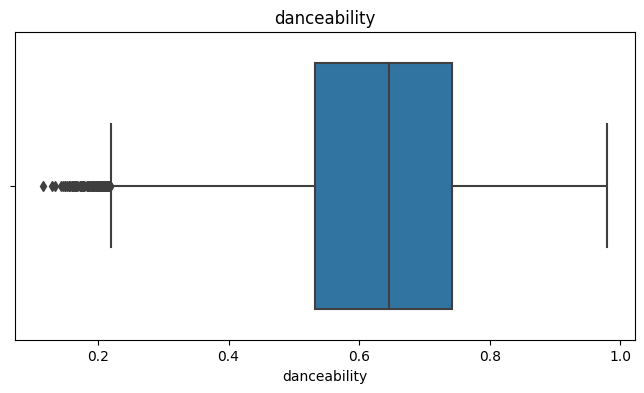

energy


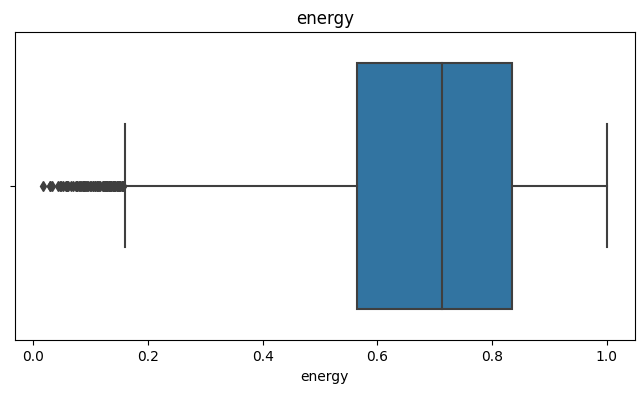

key


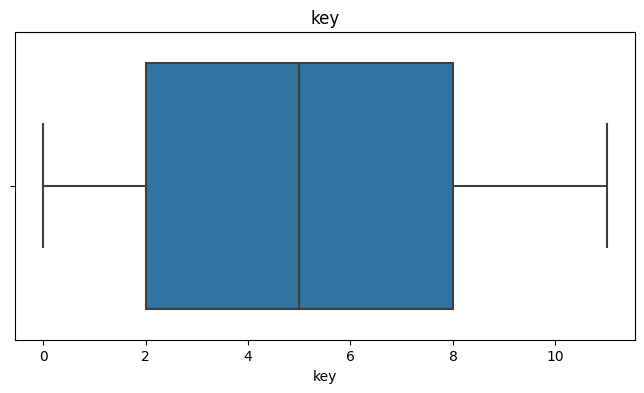

loudness


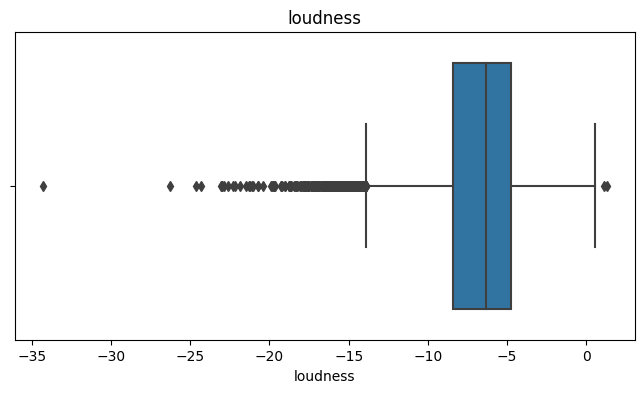

speechiness


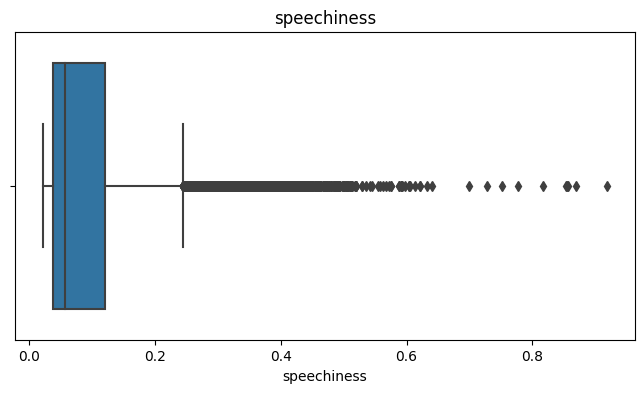

acousticness


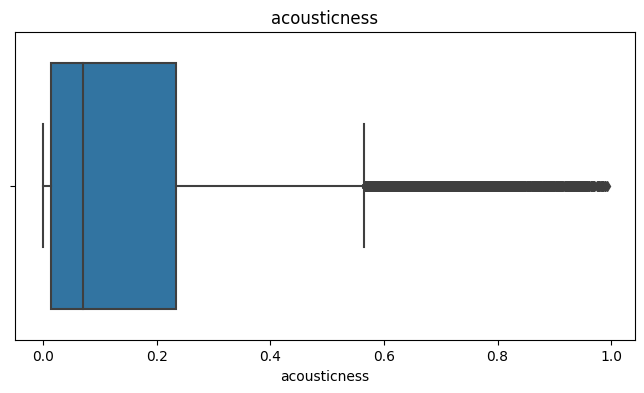

instrumentalness


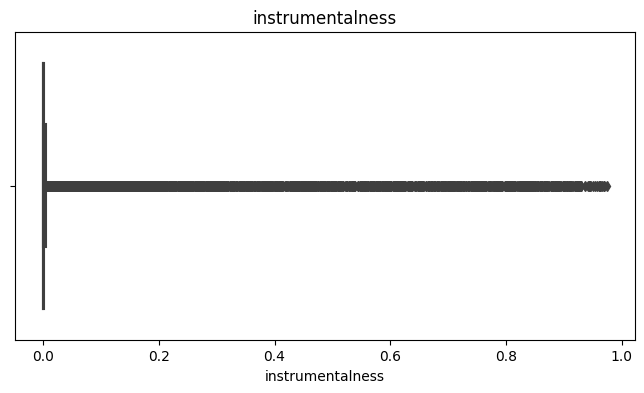

valence


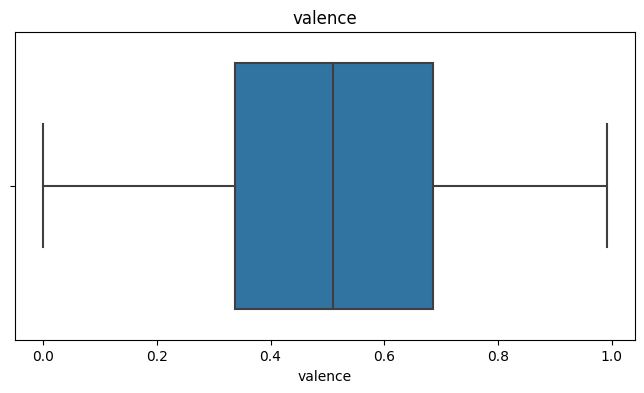

tempo


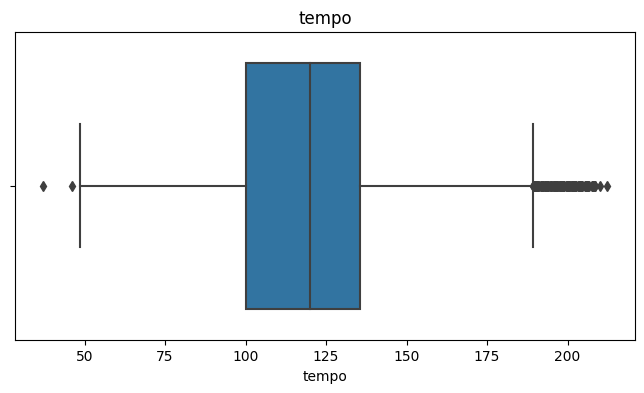

lyrics_sentiment


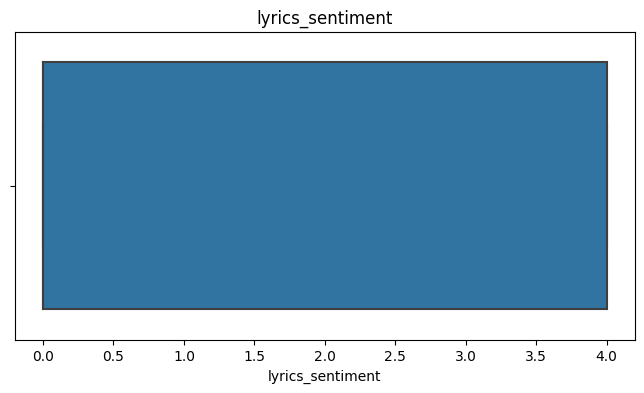

album_name_sentiment


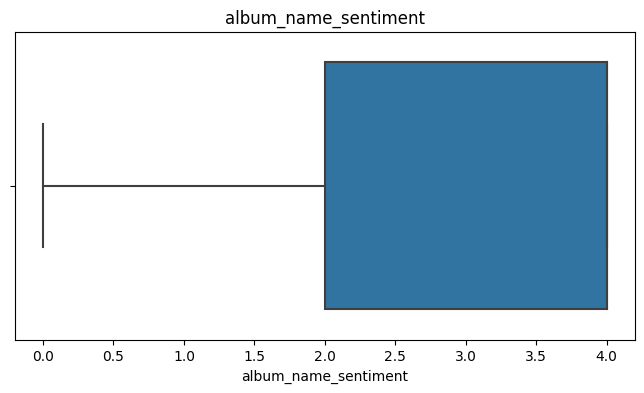

track_name_sentiment


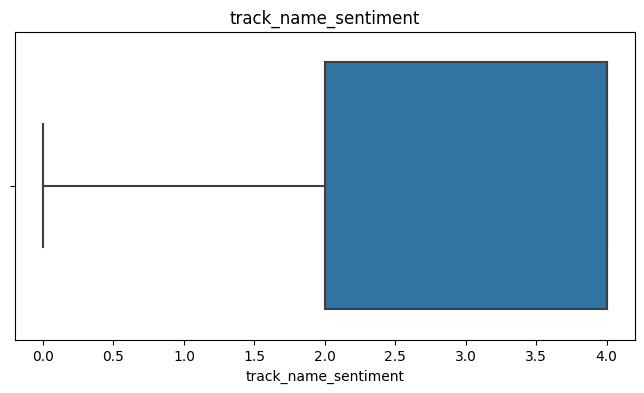

playlist_name_sentiment


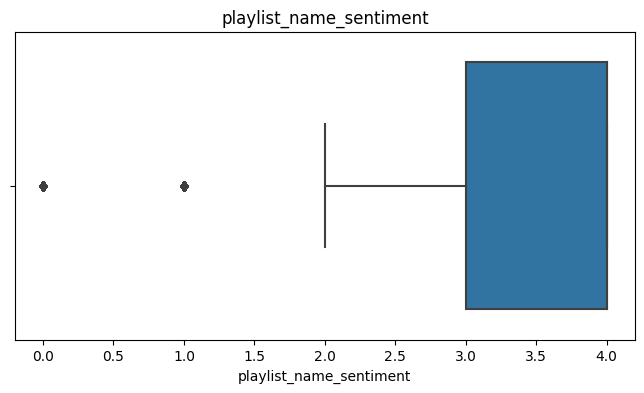

genre_edm
genre_latin
genre_pop
genre_r&b
genre_rap
genre_rock


In [55]:

for column in clustering_data.columns:
    if not str(column).startswith("genre_"):
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(column)
        print(column)
        plt.show()
    else:
        print(column)

En este caso las variables que se ven con menos tendencia a clustering con las que serán eliminadas

In [56]:
columns_unable_to_clustering = [
    "instrumentalness",
    "speechiness",
    "acousticness"
]


In [57]:
continuous_columns = [column for column in clustering_data.columns if not column.startswith("genre_")]

scaler = MinMaxScaler()
clustering_data[continuous_columns] = scaler.fit_transform(clustering_data[continuous_columns])


Ciertamente tenemos datos relavantes, pero en ocasiones estas características tienen una correlación que puede ser redunante y llegue a confundir al modelo

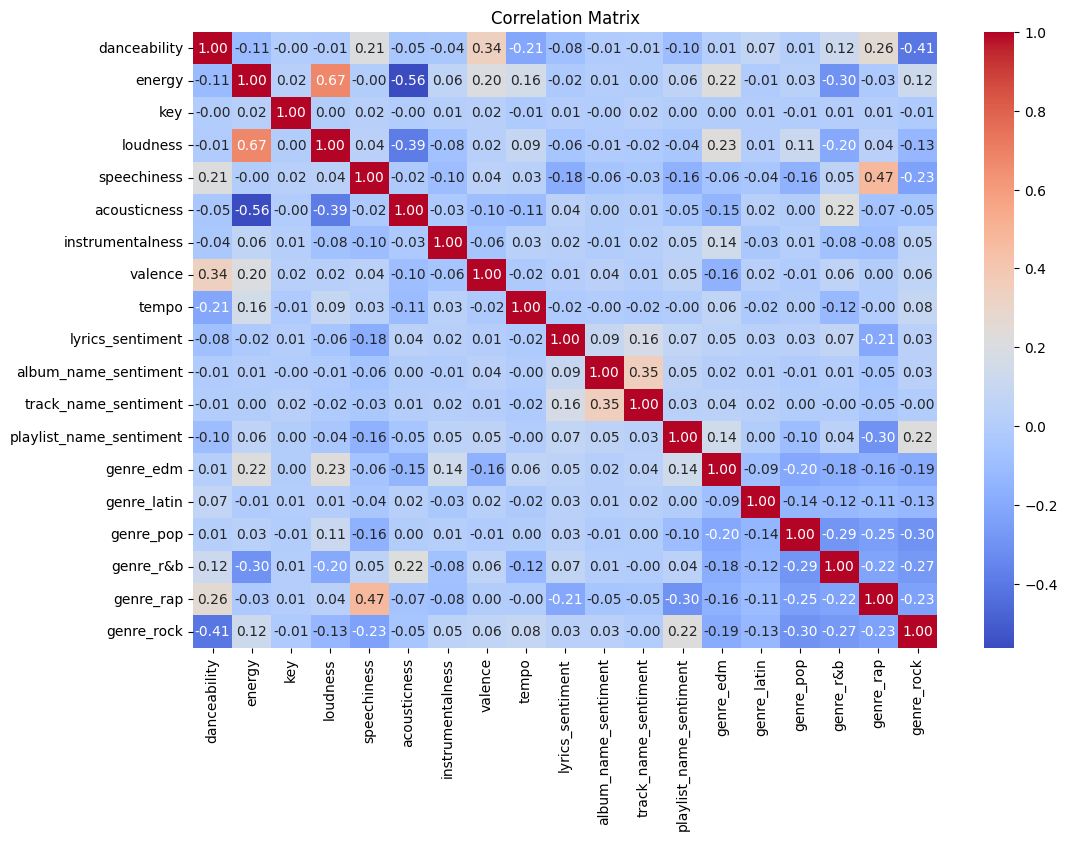

In [58]:
correlation_matrix = clustering_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [59]:
correlation_matrix = clustering_data.corr()
founded_correlations = []

for column_1, row in correlation_matrix.iterrows():
    if column_1 != "cluster":
        for column_2, correlation_score in row.items():   
            if abs(correlation_score) >= 0.35 and column_1!=column_2 and column_2!="cluster":
                print(f"{correlation_score} ({column_1} - {column_2})")
                founded_correlations.append((column_2, column_1))


-0.40748126980715127 (danceability - genre_rock)
0.6712318244060319 (energy - loudness)
-0.5624055999021875 (energy - acousticness)
0.6712318244060319 (loudness - energy)
-0.3857140388194543 (loudness - acousticness)
0.4717185715417522 (speechiness - genre_rap)
-0.5624055999021875 (acousticness - energy)
-0.3857140388194543 (acousticness - loudness)
0.4717185715417522 (genre_rap - speechiness)
-0.40748126980715127 (genre_rock - danceability)


Entre todas las características las características que resaltan son

**Danceability y Genre Rock (-0.407)**:
- La correlación negativa moderada sugiere que a medida que el género de una canción se inclina más hacia el rock, es probable que sea menos bailable.

**Energy y Loudness (0.671)**:
- Una correlación positiva fuerte indica que las canciones con mayor energía tienden a ser más altas en términos de volumen (loudness).

**Energy y Acousticness (-0.562)**:
- La correlación negativa fuerte muestra que las canciones con mayor energía tienden a tener menos acústica.

**Loudness y Acousticness (-0.386)**:
- La correlación negativa moderada sugiere que las canciones más altas suelen tener menor acústica.

**Speechiness y Genre Rap (0.472)**:

- La correlación positiva moderada indica que el género rap tiene una tendencia a tener una mayor presencia de palabras habladas en sus canciones, lo cual es característico del rap.



Todas las correlaciones encontradas resultan naturales en el ámbito de la música. Entre ellas la que podría parecer que es redundante es la Loudeness y Energy, sin embargo, en el tema de clustering, al menos para DBSCAN esta correlación puede ayudar a definir mejor los clusters dado el reforzamiento en densidad


## Kmeans - Clustering ?

### Primer acercamiento a kmeans clustering

Hacemos la elección del número de clusters utilizando el método del codo

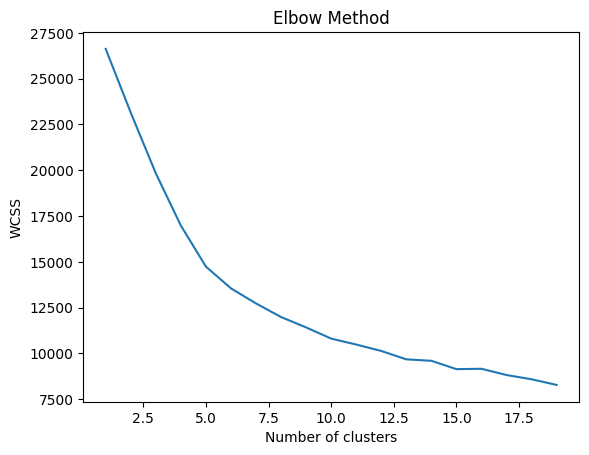

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 20): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()


No parece haber una claridad en la decisión, por tanto nos apoyamos del método de la silueta para la elección del número de clusters

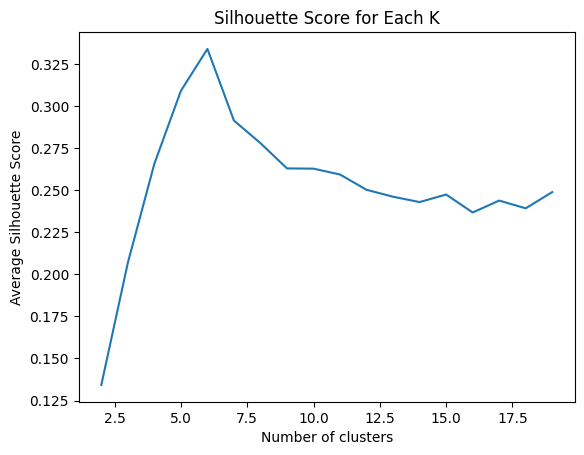

In [61]:
from sklearn.metrics import silhouette_score


range_n_clusters = list(range(2, 20)) 
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(clustering_data)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(clustering_data, cluster_labels))


plt.plot(range_n_clusters, silhouette_avg)
plt.title('Silhouette Score for Each K')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.show()


No parece tener una respuesta muy clara, así que probaremos otra forma de clustering

## DBSCAN Clustering

Una buena alternativa a Kmeans es DBSCAN

In [62]:

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=15)
clusters = dbscan.fit_predict(clustering_data)



In [63]:
clustering_data['cluster'] = clusters

In [64]:
from sklearn.metrics import silhouette_score

# No incluir el ruido en el cálculo (puntos con etiqueta -1)
mask = clusters != -1
silhouette_avg = silhouette_score(clustering_data[mask], clusters[mask])
print(f"Silhouette Coefficient: {silhouette_avg}")


Silhouette Coefficient: 0.5359453924751916


 Un valor superior a 0.4 indica que, en promedio, los clusters están bien separados y que los puntos están más cerca de su propio cluster que de los vecinos.

In [65]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_avg = calinski_harabasz_score(clustering_data[mask], clusters[mask])
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")


Calinski-Harabasz Score: 19510.930927452868


Los valores altos para esta métrica implica que los clusters son más densos y mejor definidos.

In [66]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_avg = davies_bouldin_score(clustering_data[mask], clusters[mask])
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")


Davies-Bouldin Score: 0.4841855555012557


Lo valores más bajos y cercanos a 0 son mejores, ya que indican una menor cantidad de superposición entre los clusters.

Únicamente para visualizar, utilizamos PCA para poder ver la distribución de los clusters

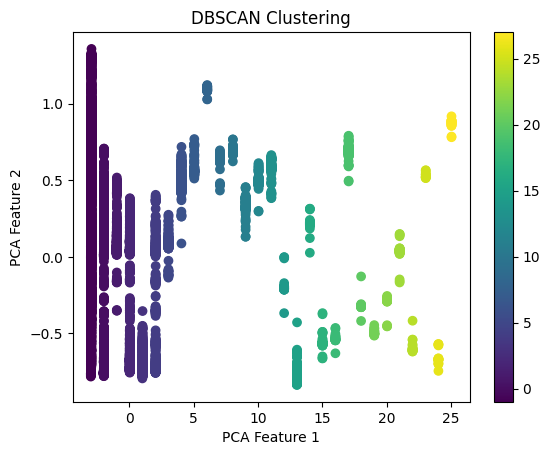

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
clustering_data_2d = pca.fit_transform(clustering_data)

plt.scatter(clustering_data_2d[:,0], clustering_data_2d[:,1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()


Los resultados son satisfactorios así que nos quedaremos con este clustering

In [68]:
clustering_data.to_csv("./data/spotify_songs_clustered.csv", index=False)